In [22]:
#Jointplot is a better scatterplot


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns
sns.set_style("darkgrid")

In [25]:
import gower

In [26]:
df = pd.read_csv("C://Users//athar//Python_Files//Datasets//books.csv",on_bad_lines='skip')

In [27]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [28]:
df.title.value_counts()

The Iliad                                               9
The Brothers Karamazov                                  9
The Odyssey                                             8
Anna Karenina                                           8
'Salem's Lot                                            8
                                                       ..
The Noonday Demon: An Atlas of Depression               1
The Noonday Demon: An Anatomy of Depression             1
My Secret: A PostSecret Book                            1
The Secret Lives of Men and Women: A PostSecret Book    1
Las aventuras de Tom Sawyer                             1
Name: title, Length: 10348, dtype: int64

In [29]:
df[df['title']=="The Iliad"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
403,1371,The Iliad,Homer/Robert Fagles/Bernard Knox,3.86,0140275363,9780140275360,eng,683,288792,3423,4/29/1999,Penguin Classics
405,1374,The Iliad,Homer/Robert Fitzgerald/Andrew Ford,3.86,0374529051,9780374529055,en-US,588,692,81,4/3/2004,Farrar Straus and Giroux
407,1376,The Iliad,Homer/E.V. Rieu/Peter Jones/D.C.H. Rieu,3.86,0140447946,9780140447941,eng,462,1919,118,1/30/2003,Penguin Classics
408,1377,The Iliad,Homer/W.H.D. Rouse,3.86,0451527372,9780451527370,en-US,312,158,15,8/1/1999,Signet Classics
555,1796,The Iliad,Homer/Robert Fitzgerald,3.86,1857150600,9781857150605,eng,594,30,2,3/19/1992,Everyman
3355,12254,The Iliad,Homer/Robert Fagles/Derek Jacobi,3.86,0143059289,9780143059288,eng,8,42,7,6/15/2006,Penguin-HighBridge
5903,22221,The Iliad,Homer,3.86,0471377589,9780471377580,eng,150,3834,134,10/28/1999,John Wiley & Sons
8534,32780,The Iliad,Homer/Andrew Lang,3.86,1904633382,9781904633389,eng,542,64,8,9/1/2011,Collector's Library
8536,32782,The Iliad,Homer/Victor G. Ambrus/Nick McCarty,3.86,0753453215,9780753453216,eng,95,8,3,9/15/2000,Kingfisher


In [30]:
# Getting the distribution for the ratings

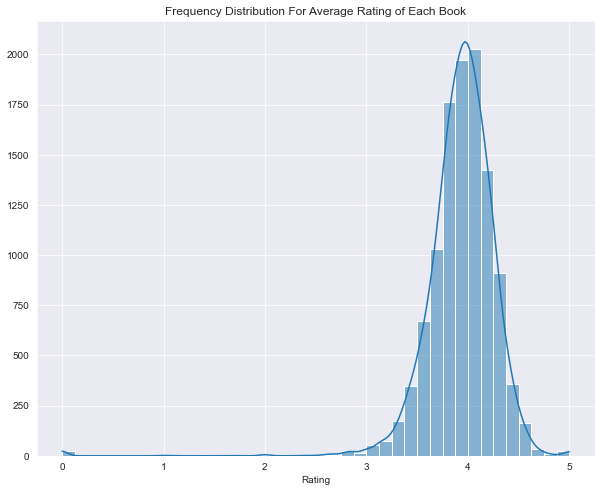

In [31]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x = "average_rating", bins = 40, kde = True)
plt.title("Frequency Distribution For Average Rating of Each Book")
plt.xlabel("Rating")
plt.ylabel("")
plt.show()

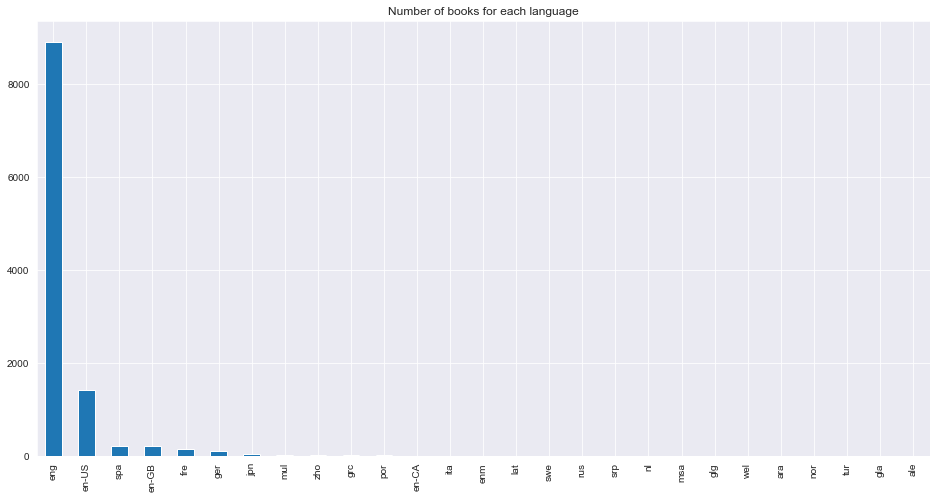

In [32]:
plt.figure(figsize=(16,8))
df['language_code'].value_counts().plot(kind="bar")
plt.title("Number of books for each language")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [33]:
# Heavily dominated by english books and en-US, en-CA and en-GB books are also english books

In [34]:
df.groupby('authors')['title'].count().reset_index().sort_values('title')

,authors,title
6638,Éric-Emmanuel Schmitt,1
3581,Kermit L. Hall/Paul Finkelman/James W. Jr. Ely,1
3580,Keri Hulme,1
5796,Stephen King/Gregorio Vlastelica,1
3578,Kenzaburō Ōe,1
...,...,...
46,Agatha Christie,33
4711,Orson Scott Card,35
5470,Rumiko Takahashi,39
5786,Stephen King,40


In [35]:
df['language_code'] = df['language_code'].apply(lambda lang: 'eng' if lang in ['en-US','en-GB','en-CA'] else lang)

In [36]:
df['language_code'].value_counts()

eng    10537
spa      218
fre      144
ger       99
jpn       46
mul       19
zho       14
grc       11
por       10
ita        5
lat        3
enm        3
rus        2
swe        2
nl         1
ara        1
srp        1
msa        1
glg        1
wel        1
nor        1
tur        1
gla        1
ale        1
Name: language_code, dtype: int64

In [37]:
#df.sort_values("ratings_count",ascending = False)

In [38]:
df['pages'] = df['  num_pages']

In [39]:
df.drop("  num_pages",axis=1,inplace=True)

In [40]:
max(df.pages)

6576

In [41]:
min(df.pages)

0

In [42]:
# Audio Books probably having page values of less than 20, can be noticed by the publisher column

In [43]:
df[df.pages<20].sort_values("pages",ascending = False).head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count,publication_date,publisher,pages
309,966,Angeles & Demonios,Dan Brown/Raúl Amundaray,3.89,0972859896,9780972859899,spa,65,7,12/1/2005,FonoLibro,18
3570,12964,Much Ado about Nothing,William Shakespeare/Samuel West/Amanda Root/Ar...,4.07,1932219250,9781932219258,eng,38,7,11/30/2005,BBC Audiobooks America,18
1573,5414,'Salem's Lot,Stephen King/Ron McLarty,4.02,0743536967,9780743536967,eng,227,54,1/19/2004,Simon & Schuster Audio,17
10707,43675,First Deadly Sin,Lawrence Sanders,4.04,0871881780,9780871881786,eng,2,0,7/1/1989,Random House Audio,17
5986,22438,The Fabric of the Cosmos: Space Time and the ...,Brian Greene,4.11,0736697500,9780736697507,eng,19,5,2/24/2004,Books on Tape,16
1410,4938,The Brothers Karamazov,Fyodor Dostoyevsky/Simon Vance/Thomas R. Beyer...,4.32,1596440791,9781596440791,eng,20,2,5/1/2005,Hovel Audio,16
6209,23410,Pimsleur German Level 1 CD: [Lessons 1-30],Pimsleur Language Programs,4.23,0743518365,9780743518369,eng,58,10,4/1/2010,Pimsleur,16
2855,10593,The Shining,Stephen King/Campbell Scott,4.22,0743537009,9780743537001,eng,357,107,8/2/2005,Simon & Schuster Audio,16
4045,14378,Sweet Dreams Mimi (Baby Einstein),Julie Aigner-Clark/Nadeem Zaidi,3.13,0786851155,9780786851157,eng,37,3,4/1/2004,Disney Press,16
5344,19322,The Tale of Peter Rabbit: A Pop-up Adventure,Beatrix Potter,4.18,0723257043,9780723257042,eng,19,2,2/2/2006,Warne,16


In [44]:
def if_audio_book(row):
    if 'Audio' in row.title or 'Audio' in row.publisher:
        return 'Yes'
    if row.pages < 20:
        return 'Yes'
    return 'No'

In [45]:
df['is_audio_book'] = df.apply(if_audio_book, axis=1)

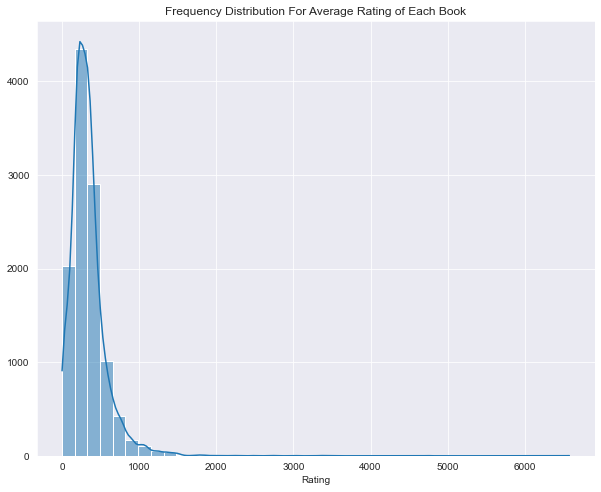

In [46]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x = "pages", bins = 40, kde = True)
plt.title("Frequency Distribution For Average Rating of Each Book")
plt.xlabel("Rating")
plt.ylabel("")
plt.show()

In [47]:
def page_category(page_count):
    if page_count < 100:
        return "Small"
    elif page_count < 300:
        return "Moderate"
    elif page_count < 500:
        return "Medium"
    elif page_count < 800:
        return "Large"
    else:
        return "Massive"

In [48]:
df['pages'] = df['pages'].apply(page_category)

In [49]:
df.shape

(11123, 13)

In [50]:
df.drop_duplicates().shape

(11123, 13)

In [51]:
#No duplicates

In [52]:
df['year'] = df['publication_date'].apply(lambda date: date[-4:])

In [53]:
final_df = df[['average_rating','ratings_count','text_reviews_count','pages','is_audio_book','year','language_code']]

In [54]:
final_df.index = df.bookID

In [55]:
final_df

,average_rating,ratings_count,text_reviews_count,pages,is_audio_book,year,language_code
bookID,,,,,,,
1,4.57,2095690,27591,Large,No,2006,eng
2,4.49,2153167,29221,Massive,No,2004,eng
4,4.42,6333,244,Medium,No,2003,eng
5,4.56,2339585,36325,Medium,No,2004,eng
8,4.78,41428,164,Massive,No,2004,eng
...,...,...,...,...,...,...,...
45631,4.06,156,20,Large,No,2004,eng
45633,4.08,783,56,Large,No,1988,eng
45634,3.96,820,95,Medium,No,1993,eng


In [56]:
distance_matrix = gower.gower_matrix(final_df)

In [57]:
len(distance_matrix)

11123

In [58]:
final_df[final_df.index == 24]

,average_rating,ratings_count,text_reviews_count,pages,is_audio_book,year,language_code
bookID,,,,,,,
24,4.07,72451,4245,Medium,No,2001,eng


In [59]:
df[df['bookID'] == 24]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count,publication_date,publisher,pages,is_audio_book,year
15,24,In a Sunburned Country,Bill Bryson,4.07,0767903862,9780767903868,eng,72451,4245,5/15/2001,Broadway Books,Medium,No,2001


In [60]:
book_id_to_row = dict(zip(final_df.index,range(11123)))

In [61]:
row_to_book_id = dict(zip(range(11123),final_df.index))

In [62]:
def give_rcmdtn_from_id(indx):
    # take the book id 
    # get the row number from dct
    # access the row of the distance matrix
    # get the 5 indexes with minimum dist
    # get the book ids from the second dct
    # print those dcts
    
    row_no = book_id_to_row[indx]
    row_no_dsts = distance_matrix[row_no]
    idxs = np.argsort(row_no_dsts)[1:6]
    numb_row_lst=[]
    for idx in idxs:
        numb_row_lst.append(row_to_book_id[idx])
    return numb_row_lst

In [66]:
books_reccomended = give_rcmdtn_from_id(5107)

In [67]:
df.loc[df['bookID'].isin(books_reccomended)]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count,publication_date,publisher,pages,is_audio_book,year
571,1852,The Call of the Wild,Jack London/Avi,3.86,0439227143,9780439227148,eng,274649,7203,1/1/2001,Scholastic,Moderate,No,2001
1464,5113,Franny and Zooey,J.D. Salinger,3.98,0316769029,9780316769020,eng,167157,4994,1/30/2001,Back Bay Books,Moderate,No,2001
6422,24178,Charlotte's Web,E.B. White/Garth Williams/Rosemary Wells,4.17,0064410935,9780064410939,eng,1300470,14739,10/1/2001,HarperCollinsPublishers,Moderate,No,2001
9743,38980,The Princess Diaries (The Princess Diaries #1),Meg Cabot,3.78,0613371658,9780613371650,eng,216359,4137,7/1/2001,Turtleback,Moderate,No,2001
10340,41899,Fantastic Beasts and Where to Find Them (Hogwa...,Newt Scamander/J.K. Rowling,3.99,0439321603,9780439321600,eng,259399,5513,6/1/2001,Arthur A. Levine Books,Moderate,No,2001


In [68]:
df[df['title']=="The Hobbit or There and Back Again"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count,publication_date,publisher,pages,is_audio_book,year
